In [1]:
!pip install pandas_datareader

In [2]:
!pip install yfinance

In [3]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid')
plt.style.use("fivethirtyeight") #This line sets the overall style of Matplotlib plots. In this case, it's using the "fivethirtyeight" style.
%matplotlib inline

# For reading stock data from yahoo
from pandas_datareader.data import DataReader
import yfinance as yf #yfinance is a Python library that provides a simple interface to download financial data from Yahoo Finance. It allows users to fetch historical market data, current market data, and various financial information for stocks, indices, currencies, and commodities.
from pandas_datareader import data as pdr

yf.pdr_override()

# For time stamps
from datetime import datetime


# The tech stocks we'll use for this analysis
tech_list = ['AAPL', 'GOOG', 'MSFT', 'AMZN']

# Set up End and Start times for data grab
tech_list = ['AAPL', 'GOOG', 'MSFT', 'AMZN']

end = datetime.now()
start = datetime(end.year - 1, end.month, end.day)

for stock in tech_list:
    globals()[stock] = yf.download(stock, start, end)


company_list = [AAPL, GOOG, MSFT, AMZN]
company_name = ["APPLE", "GOOGLE", "MICROSOFT", "AMAZON"]

for company, com_name in zip(company_list, company_name):
    company["company_name"] = com_name

df = pd.concat(company_list, axis=0)
df.tail(10)

[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume,company_name
Date,,,,,,,
2024-02-22,173.100006,174.800003,171.770004,174.580002,174.580002,55392400,AMAZON
2024-02-23,174.279999,175.750000,173.699997,174.990005,174.990005,59715200,AMAZON
2024-02-26,175.699997,176.369995,174.259995,174.729996,174.729996,44368600,AMAZON
2024-02-27,174.080002,174.619995,172.860001,173.539993,173.539993,31141700,AMAZON
2024-02-28,172.440002,174.050003,172.270004,173.160004,173.160004,28180500,AMAZON
2024-02-29,173.009995,177.220001,172.850006,176.759995,176.759995,53805400,AMAZON
2024-03-01,176.750000,178.729996,176.070007,178.220001,178.220001,31956200,AMAZON
2024-03-04,177.529999,180.139999,177.490005,177.580002,177.580002,37381500,AMAZON
2024-03-05,176.929993,176.929993,173.300003,174.119995,174.119995,37228300,AMAZON


In [5]:
AAPL.describe()

,Open,High,Low,Close,Adj Close,Volume
count,253.000000,253.000000,253.000000,253.000000,253.000000,2.530000e+02
mean,179.440791,180.912174,178.109526,179.619368,179.103358,5.735926e+07
std,11.376547,11.197899,11.319500,11.236447,11.370150,1.693666e+07
min,147.809998,150.940002,147.610001,148.500000,147.711563,2.404830e+07
25%,172.479996,174.009995,171.449997,172.990005,172.432510,4.677800e+07
50%,180.089996,181.929993,178.330002,180.570007,179.859741,5.337730e+07
75%,189.259995,189.990005,187.610001,189.300003,188.850006,6.384130e+07
max,198.020004,199.619995,197.000000,198.110001,197.857529,1.366826e+08


In [6]:
# General info
AAPL.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 253 entries, 2023-03-06 to 2024-03-06
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Open          253 non-null    float64
 1   High          253 non-null    float64
 2   Low           253 non-null    float64
 3   Close         253 non-null    float64
 4   Adj Close     253 non-null    float64
 5   Volume        253 non-null    int64  
 6   company_name  253 non-null    object 
dtypes: float64(5), int64(1), object(1)
memory usage: 15.8+ KB


In [4]:
#LSTM Training
import numpy as np
import pandas as pd
import yfinance as yf
from datetime import datetime
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import LSTM, Dense

# Function to prepare data for LSTM model
def prepare_data(data):
    scaler = MinMaxScaler(feature_range=(0, 1))
    scaled_data = scaler.fit_transform(data.values.reshape(-1, 1))
    return scaled_data, scaler

# Function to create LSTM model
def create_lstm_model():
    model = Sequential()
    model.add(LSTM(64, input_shape=(1, 1)))
    model.add(Dense(1))
    model.compile(loss='mean_squared_error', optimizer='adam')
    return model

In [7]:
for stock in tech_list:
    globals()[stock] = yf.download(stock, start=start, end=end)['Close']

# Prepare data for training
data_dict = {}
scaler_dict = {}
for stock in tech_list:
    data_dict[stock], scaler_dict[stock] = prepare_data(globals()[stock])


[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


In [10]:
models = {}
for stock in tech_list:
    X_train = data_dict[stock][:-1]
    y_train = data_dict[stock][1:]

    X_train = X_train.reshape(X_train.shape[0], 1, 1)

    model = create_lstm_model()
    model.fit(X_train, y_train, epochs=100, batch_size=1)

    models[stock] = model

Epoch 1/100
251/251 [==============================] - 6s 5ms/step - loss: 0.0700
Epoch 2/100
251/251 [==============================] - 1s 4ms/step - loss: 0.0084
Epoch 3/100
251/251 [==============================] - 1s 4ms/step - loss: 0.0043
Epoch 4/100
251/251 [==============================] - 1s 4ms/step - loss: 0.0026
Epoch 5/100
251/251 [==============================] - 1s 4ms/step - loss: 0.0021
Epoch 6/100
251/251 [==============================] - 1s 4ms/step - loss: 0.0021
Epoch 7/100
251/251 [==============================] - 1s 2ms/step - loss: 0.0021
Epoch 8/100
251/251 [==============================] - 1s 2ms/step - loss: 0.0021
Epoch 9/100
251/251 [==============================] - 1s 2ms/step - loss: 0.0021
Epoch 10/100
251/251 [==============================] - 1s 2ms/step - loss: 0.0021
Epoch 11/100
251/251 [==============================] - 1s 2ms/step - loss: 0.0021
Epoch 12/100
251/251 [==============================] - 1s 2ms/step - loss: 0.0022
Epoch 13/100


In [8]:
total_data_points = sum(len(data_dict[stock]) for stock in tech_list)  # Total number of data points across all stocks

# Calculate the number of removed data points (first and last) for each stock
removed_data_points = sum(2 for stock in tech_list)  # Two data points (first and last) removed for each stock

# Calculate the number of training data points (total - removed)
trained_data_points = total_data_points - removed_data_points

# Calculate the percentage of data trained
percentage_trained = (trained_data_points / total_data_points) * 100

print("Percentage of data trained:", percentage_trained)


Percentage of data trained: 99.20634920634922


In [11]:
future_prices = {}
for stock in tech_list:
    last_price = data_dict[stock][-1]

    X_pred = np.array([last_price]).reshape(1, 1, 1)

    future_price_scaled = models[stock].predict(X_pred)

    future_price = scaler_dict[stock].inverse_transform(future_price_scaled)

    future_prices[stock] = future_price

print(future_prices)   #the prediction of future stock prices occurs at the point where the model is used to forecast the next price based on the last observed price

1/1 [==============================] - 1s 562ms/step
{'AAPL': array([[169.00598]], dtype=float32), 'GOOG': array([[133.02573]], dtype=float32), 'MSFT': array([[399.41513]], dtype=float32), 'AMZN': array([[172.76329]], dtype=float32)}


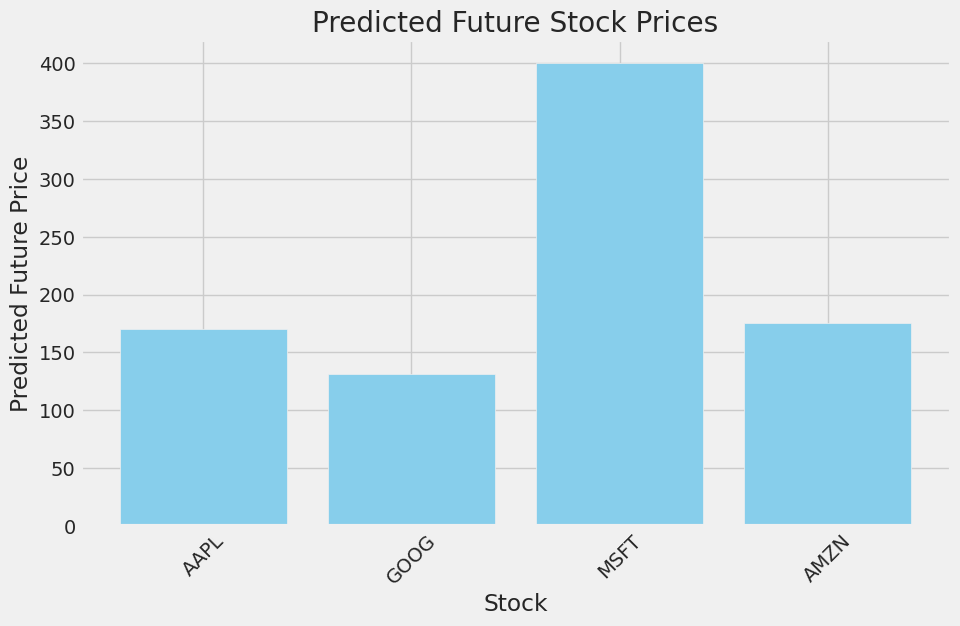

In [13]:
import matplotlib.pyplot as plt
#bar chart where each bar represents the predicted future price for a specific stock.
# Extracting stock symbols and predicted prices
stocks = list(future_prices.keys())
prices = [future_prices[stock][0][0] for stock in stocks]

# Creating a bar chart to visualize predicted future prices
plt.figure(figsize=(10, 6))
plt.bar(stocks, prices, color='green')
plt.xlabel('Stock')
plt.ylabel('Predicted Future Price')
plt.title('Predicted Future Stock Prices')
plt.xticks(rotation=45)
plt.show()

In [14]:
import plotly.graph_objects as go

# Extracting stock symbols and predicted prices
stocks = list(future_prices.keys())
prices = [future_prices[stock][0][0] for stock in stocks]

# Create a horizontal bar chart to visualize predicted future prices
fig = go.Figure(data=[go.Bar(
    y=stocks,
    x=prices,
    orientation='h',
    marker_color='skyblue'
)])

fig.update_layout(title='Predicted Future Stock Prices',
                  xaxis_title='Predicted Price',
                  yaxis_title='Stock',
                  template='plotly_white')

fig.show()

In [15]:
import numpy as np

# Define scenarios
scenarios = ['Scenario A', 'Scenario B', 'Scenario C']

# Adjust variables for each scenario
for scenario in scenarios:
    # Example: Adjusting a variable like market sentiment or economic conditions
    if scenario == 'Scenario A':
        variable_a = 0.1  # Placeholder value for Scenario A
        # Adjust other variables specific to Scenario A if needed
    elif scenario == 'Scenario B':
        variable_a = 0.5  # Placeholder value for Scenario B
        # Adjust other variables specific to Scenario B if needed
    else:
        variable_a = 0.9  # Placeholder value for Scenario C
        # Adjust other variables specific to Scenario C if needed

# Use LSTM model to predict future prices under each scenario
future_prices_scenarios = {}
for stock in tech_list:
    future_prices_scenarios[stock] = {}
    for scenario in scenarios:
        # Assuming X_pred_scenario is a placeholder for future data preparation
        X_pred_scenario = np.array([future_prices[stock]])  # Placeholder input data
        future_price_scaled_scenario = models[stock].predict(X_pred_scenario.reshape(1, 1, 1))
        future_price_scenario = scaler_dict[stock].inverse_transform(future_price_scaled_scenario)
        future_prices_scenarios[stock][scenario] = future_price_scenario

# Evaluate and display results for each scenario
for stock in tech_list:
    print(f"Stock: {stock}")
    for scenario in scenarios:
        print(f"Scenario: {scenario} - Predicted Future Price: {future_prices_scenarios[stock][scenario][0][0]}")


1/1 [==============================] - 0s 22ms/step
Stock: AAPL
Scenario: Scenario A - Predicted Future Price: 386.90673828125
Scenario: Scenario B - Predicted Future Price: 386.90673828125
Scenario: Scenario C - Predicted Future Price: 386.90673828125
Stock: GOOG
Scenario: Scenario A - Predicted Future Price: 266.3788146972656
Scenario: Scenario B - Predicted Future Price: 266.3788146972656
Scenario: Scenario C - Predicted Future Price: 266.3788146972656
Stock: MSFT
Scenario: Scenario A - Predicted Future Price: 1213.58544921875
Scenario: Scenario B - Predicted Future Price: 1213.58544921875
Scenario: Scenario C - Predicted Future Price: 1213.58544921875
Stock: AMZN
Scenario: Scenario A - Predicted Future Price: 553.6486206054688
Scenario: Scenario B - Predicted Future Price: 553.6486206054688
Scenario: Scenario C - Predicted Future Price: 553.6486206054688


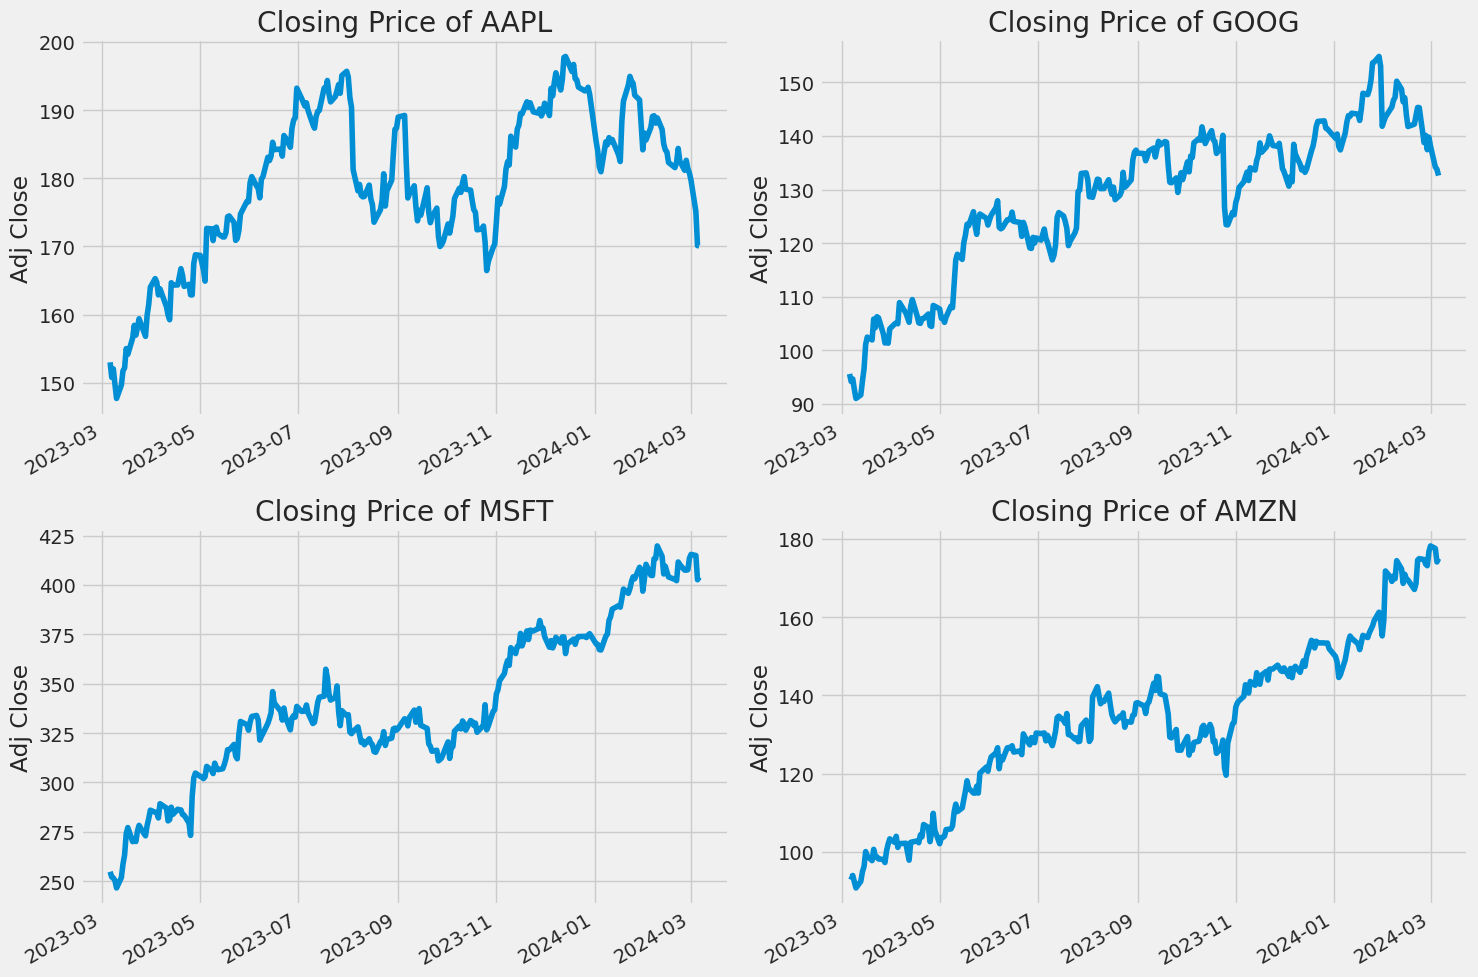

In [16]:
# Let's see a historical view of the closing price
plt.figure(figsize=(15, 10))
plt.subplots_adjust(top=1.25, bottom=1.2)

for i, company in enumerate(company_list, 1):
    plt.subplot(2, 2, i)
    company['Adj Close'].plot()
    plt.ylabel('Adj Close')
    plt.xlabel(None)
    plt.title(f"Closing Price of {tech_list[i - 1]}")

plt.tight_layout()

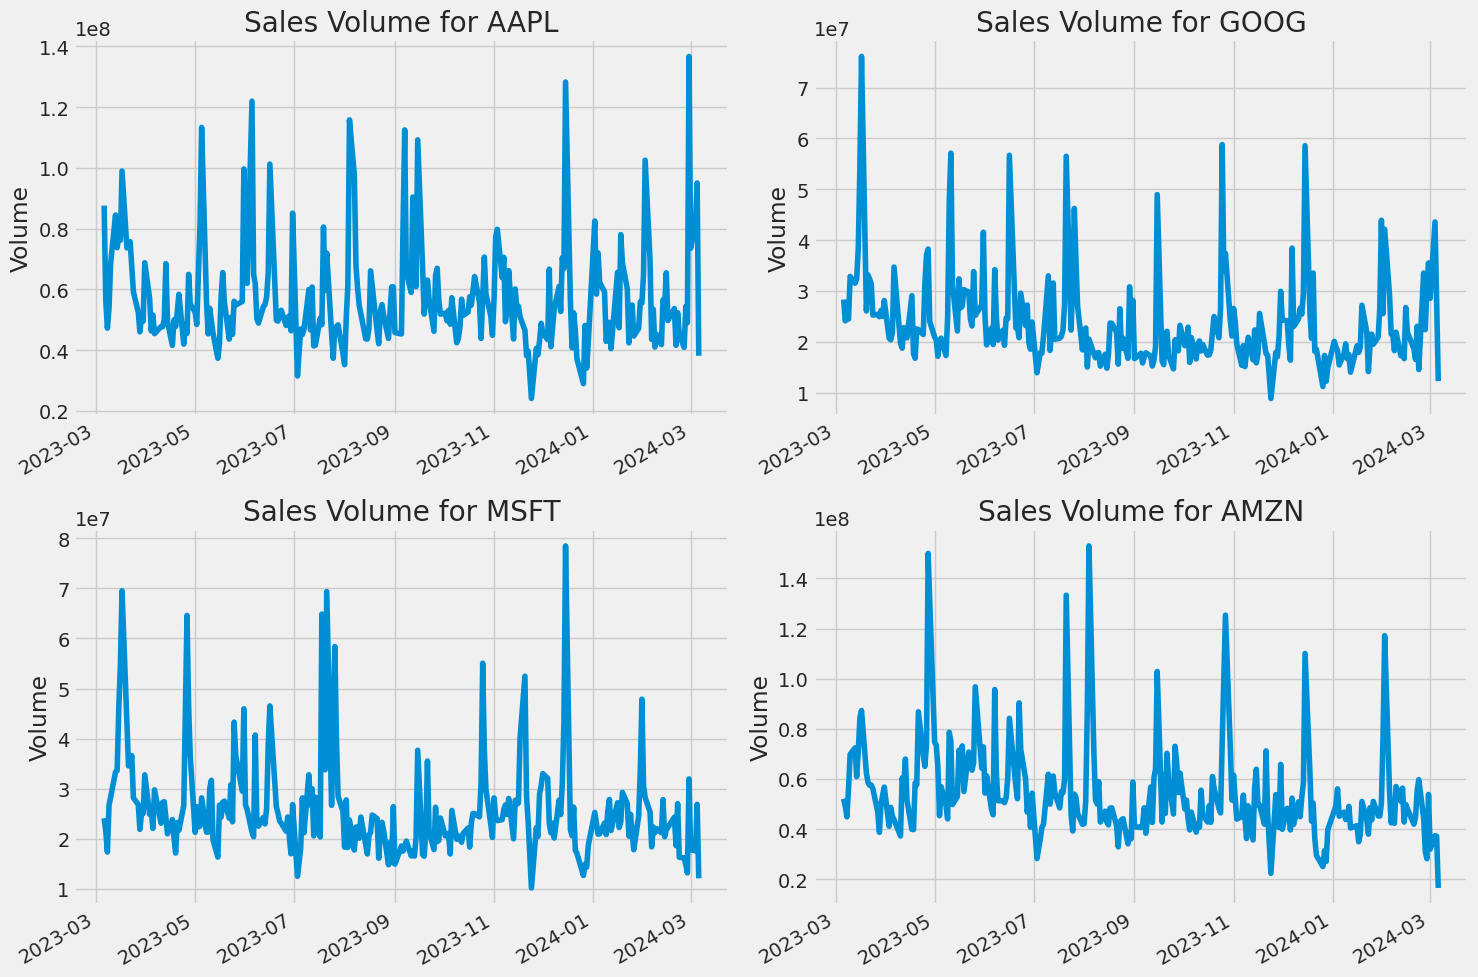

In [17]:
# Now let's plot the total volume of stock being traded each day
plt.figure(figsize=(15, 10))
plt.subplots_adjust(top=1.25, bottom=1.2)

for i, company in enumerate(company_list, 1):
    plt.subplot(2, 2, i)
    company['Volume'].plot()
    plt.ylabel('Volume')
    plt.xlabel(None)
    plt.title(f"Sales Volume for {tech_list[i - 1]}")

plt.tight_layout()

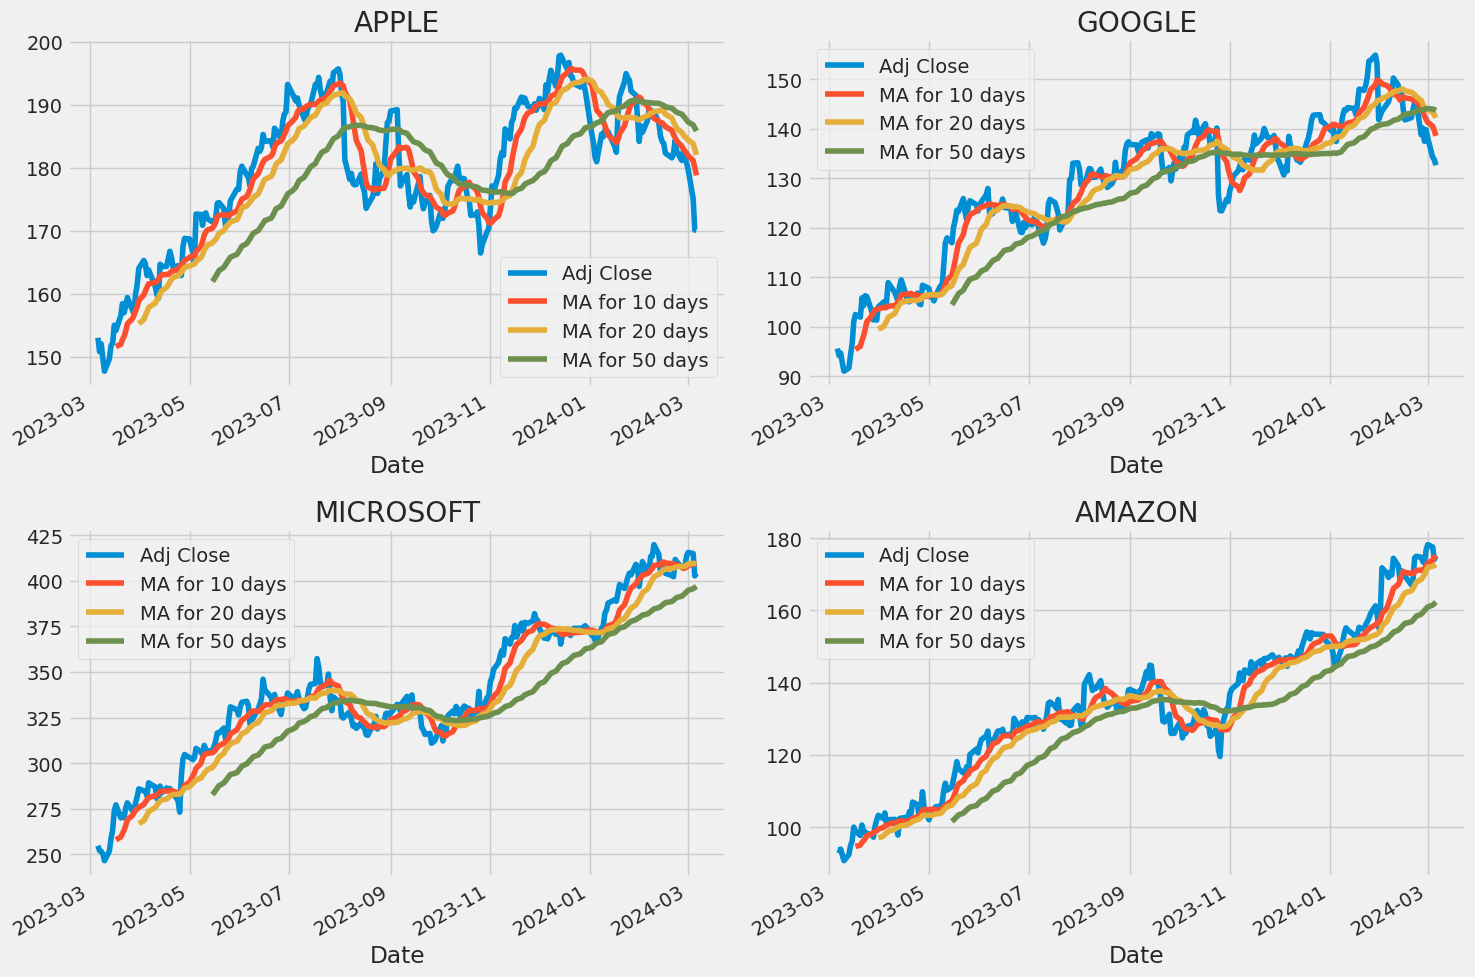

In [26]:
import matplotlib.pyplot as plt

# Assuming company_list contains DataFrames for each company
for ma in ma_day:
    for company in company_list:
        column_name = f"MA for {ma} days"
        company[column_name] = company['Adj Close'].rolling(ma).mean()

fig, axes = plt.subplots(nrows=2, ncols=2)
fig.set_figheight(10)
fig.set_figwidth(15)

company_list[0][['Adj Close', 'MA for 10 days', 'MA for 20 days', 'MA for 50 days']].plot(ax=axes[0,0])
axes[0,0].set_title('APPLE')

company_list[1][['Adj Close', 'MA for 10 days', 'MA for 20 days', 'MA for 50 days']].plot(ax=axes[0,1])
axes[0,1].set_title('GOOGLE')

company_list[2][['Adj Close', 'MA for 10 days', 'MA for 20 days', 'MA for 50 days']].plot(ax=axes[1,0])
axes[1,0].set_title('MICROSOFT')

company_list[3][['Adj Close', 'MA for 10 days', 'MA for 20 days', 'MA for 50 days']].plot(ax=axes[1,1])
axes[1,1].set_title('AMAZON')

fig.tight_layout()
plt.show()


In [19]:
# Grab all the closing prices for the tech stock list into one DataFrame

closing_df = pdr.get_data_yahoo(tech_list, start=start, end=end)['Adj Close']

# Make a new tech returns DataFrame
tech_rets = closing_df.pct_change()
tech_rets.head()

[*********************100%%**********************]  4 of 4 completed


Ticker,AAPL,AMZN,GOOG,MSFT
Date,,,,
2023-03-06,NaN,NaN,NaN,NaN
2023-03-07,-0.014496,-0.002133,-0.014752,-0.010589
2023-03-08,0.008377,0.003955,0.005097,-0.001771
2023-03-09,-0.014915,-0.017781,-0.021025,-0.005439
2023-03-10,-0.013879,-0.016477,-0.017807,-0.014783


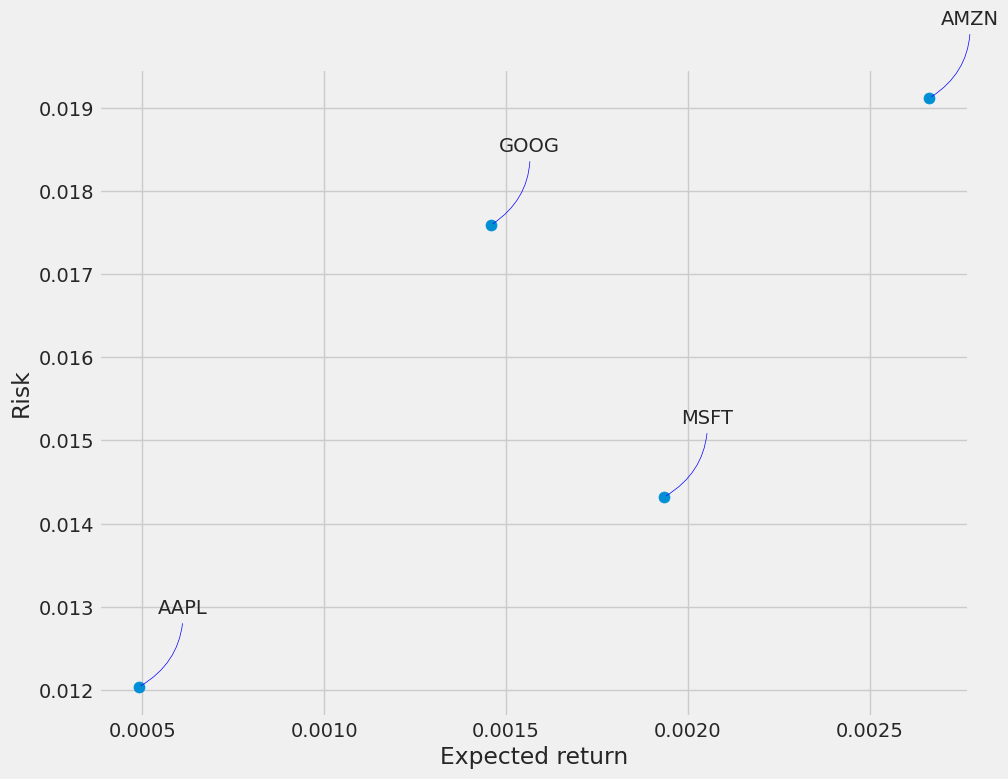

In [20]:

#How much value do we put at risk by investing in a particular stock?
rets = tech_rets.dropna()

area = np.pi * 20

plt.figure(figsize=(10, 8))
plt.scatter(rets.mean(), rets.std(), s=area)
plt.xlabel('Expected return')
plt.ylabel('Risk')

for label, x, y in zip(rets.columns, rets.mean(), rets.std()):
    plt.annotate(label, xy=(x, y), xytext=(50, 50), textcoords='offset points', ha='right', va='bottom',
                 arrowprops=dict(arrowstyle='-', color='blue', connectionstyle='arc3,rad=-0.3'))

In [21]:
# Get the stock quote
df = pdr.get_data_yahoo('AAPL', start='2012-01-01', end=datetime.now())
# Show teh data
df

[*********************100%%**********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2012-01-03,14.621429,14.732143,14.607143,14.686786,12.433828,302220800
2012-01-04,14.642857,14.810000,14.617143,14.765714,12.500642,260022000
2012-01-05,14.819643,14.948214,14.738214,14.929643,12.639428,271269600
2012-01-06,14.991786,15.098214,14.972143,15.085714,12.771558,318292800
2012-01-09,15.196429,15.276786,15.048214,15.061786,12.751300,394024400
...,...,...,...,...,...,...
2024-02-29,181.270004,182.570007,179.529999,180.750000,180.750000,136682600
2024-03-01,179.550003,180.529999,177.380005,179.660004,179.660004,73488000
2024-03-04,176.149994,176.899994,173.789993,175.100006,175.100006,81510100


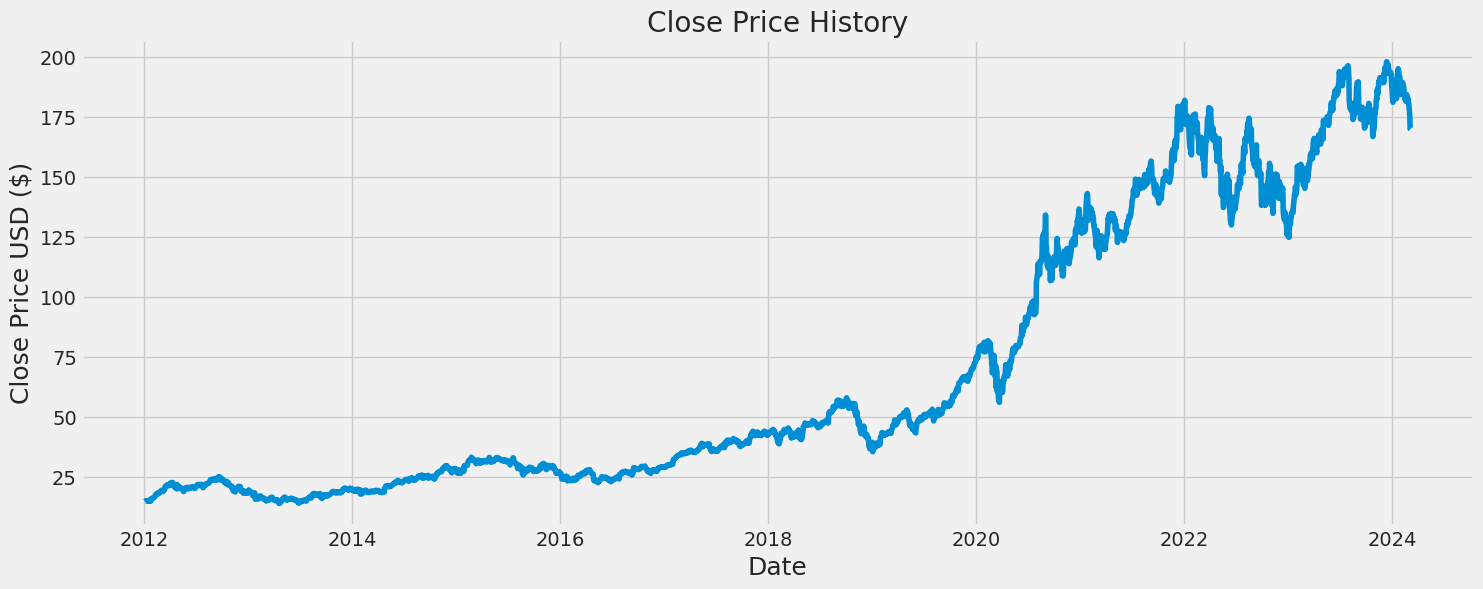

In [22]:
plt.figure(figsize=(16,6))
plt.title('Close Price History')
plt.plot(df['Close'])
plt.xlabel('Date', fontsize=18)
plt.ylabel('Close Price USD ($)', fontsize=18)
plt.show()
